<a href="https://colab.research.google.com/github/leenago/Asiae_edu/blob/master/Industrial_Bigdata/200917_%EB%84%A4%EC%9D%B4%EB%B2%84%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%9E%A9_%EA%B2%80%EC%83%89%EC%96%B4%ED%8A%B8%EB%A0%8C%EB%93%9C_(1)%ED%95%A8%EC%88%98%EB%A7%8C%EB%93%A4%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 네이버 데이터랩에서 검색어 트렌드 분석하기
- 검색어 트렌드 분석을 하여, 검색어 증가에 따른 주가 영향을 분석해본다.
- 마케팅 효과와 검색어 증가량을 분석해볼 수 있다.
- 마케팅 효과의 지속기간을 파악하여, 마케팅 수명관리를 해볼 수 있다.
- 경쟁사의 마케팅 파급효과 분석을 해볼 수 있다.

  +) 여기에 추가적으로 NLP를 추가한다면, 더 정확한 트렌드 분석을 할 수 있다.

- [reference](https://developers.naver.com/docs/datalab/search/#python) 
  - 'Naver Developer' 가입
  - 'Application 등록'을 해주어야 한다.

##1.사전작업
- 필요 패키지 설치하기

In [1]:
%config InlineBackend.figure_format = 'retina'
!apt -qq -y install fonts-nanum

The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 11 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Selecting previously unselected package fonts-nanum.
(Reading database ... 144676 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
import matplotlib.gridspec as gridspec

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()
mpl.pyplot.rc('font', family='NanumGothic')
fm._rebuild()


##2.작업하기

## 1)Naver Developer에서 제공하는 '**통합 검색어 트렌드 API**' 가져오기

In [3]:
nid = 
nkey = 

In [4]:
#reference에서 제공해주는 코드 가져오기

import json
import os
import sys
import urllib.request

client_id = nid
client_secret = nkey 
url = "https://openapi.naver.com/v1/datalab/search";
#body = "{\"startDate\":\"2017-01-01\",\"endDate\":\"2017-04-30\",\"timeUnit\":\"month\",\"keywordGroups\":[{\"groupName\":\"한글\",\"keywords\":[\"한글\",\"korean\"]},{\"groupName\":\"영어\",\"keywords\":[\"영어\",\"english\"]}],\"device\":\"pc\",\"ages\":[\"1\",\"2\"],\"gender\":\"f\"}"
body="""{
    "startDate":"2019-01-01",
    "endDate":"2020-08-30",
    "timeUnit":"month",
    "keywordGroups":[
          {"groupName":"CJ제일제당","keywords":["햇반","비비고죽"]},
          {"groupName":"오뚜기","keywords":["오뚜기밥","오뚜기죽"]}
    ]
    }"""            #주석처리 된, 원래의 body를 보기 좋게 만들어주었다.
                    #reference 페이지에 가보면, 더 많은 parameter들이 존재한다.
                    
request = urllib.request.Request(url)
request.add_header("X-Naver-Client-Id",client_id)
request.add_header("X-Naver-Client-Secret",client_secret)
request.add_header("Content-Type","application/json")
response = urllib.request.urlopen(request, data=body.encode("utf-8"))
rescode = response.getcode()

if (rescode==200):
    response_body = response.read()
    res=response_body.decode('utf-8')
    print(res)
else:
    print("Error Code:" + rescode)

{"startDate":"2019-01-01","endDate":"2020-08-31","timeUnit":"month","results":[{"title":"CJ제일제당","keywords":["햇반","비비고죽"],"data":[{"period":"2019-01-01","ratio":53.40005},{"period":"2019-02-01","ratio":46.84133},{"period":"2019-03-01","ratio":57.14318},{"period":"2019-04-01","ratio":57.25232},{"period":"2019-05-01","ratio":57.56844},{"period":"2019-06-01","ratio":49.64969},{"period":"2019-07-01","ratio":100},{"period":"2019-08-01","ratio":73.58257},{"period":"2019-09-01","ratio":57.71744},{"period":"2019-10-01","ratio":63.04205},{"period":"2019-11-01","ratio":60.63811},{"period":"2019-12-01","ratio":56.54944},{"period":"2020-01-01","ratio":56.4412},{"period":"2020-02-01","ratio":90.03147},{"period":"2020-03-01","ratio":82.70283},{"period":"2020-04-01","ratio":67.35309},{"period":"2020-05-01","ratio":53.44081},{"period":"2020-06-01","ratio":53.82305},{"period":"2020-07-01","ratio":57.41174},{"period":"2020-08-01","ratio":60.42707}]},{"title":"오뚜기","keywords":["오뚜기밥","오뚜기죽"],"data":[{"pe

- JSON 형식 속성
  - startDate: 조회 기간 시작 날짜(`yyyy-mm-dd` 형식)
  - endDate: 조회 기간 종료 날짜(`yyyy-mm-dd` 형식)
  - timeUnit: 구간 단위
  - results.title: 주제어
  - results.keywords: 주제어에 해당하는 검색어
  - result.data.period: 구간별 시작 날짜(`yyyy-mm-dd` 형식)
  - results.data.ratio: **구간별 검색량**의 **상대적 비율**. 구간별 결과에서 **가장 큰 값**을 **100**으로 설정한 상댓값입니다.

- [파라메터 설정값](https://developers.naver.com/docs/datalab/search/#python) 은 여기서 참고


## 2)'통합 검색어 트렌드 API' 수정 작업

### (1) JSON 데이터 분해해서 알아보기

2


       period     ratio
0  2019-01-01  53.40005
1  2019-02-01  46.84133
2  2019-03-01  57.14318
3  2019-04-01  57.25232
4  2019-05-01  57.56844




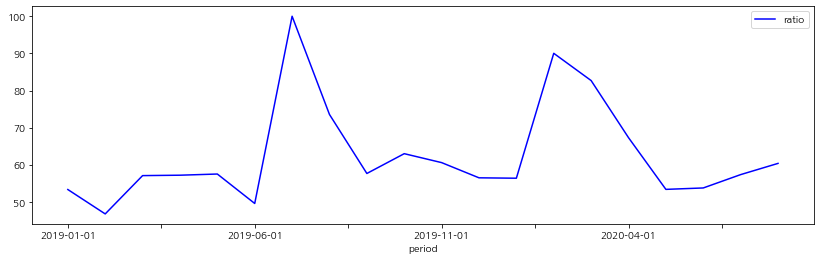

In [48]:
#json을 jdata로 분해해서 알아본 것 

jdata = json.loads(res)       #위에서 정의한 res를 쪼개보는 작업
#print(jdata)                 #jdata에는 'startDate','endDate','timeUnit','results'라는 key가 있고, 
#print(jdata['results'])      #'results'에는 [] 안에 {제일제당}, {오뚜기} 가 있음
print(len(jdata['results']))  #그래서 len이 2개인 것!
#rint(jdata['results'][1])    #0: 제일제당, 1:오뚜기
print('\n')

pdata = jdata['results'][0]['data']
cjdf = pd.DataFrame.from_dict(pdata)
print(cjdf.head())
print('\n')

#period와 ratio를 시각화
plt.rcParams["figure.figsize"] = (14,4) 
cjdf.plot(kind='line', x='period', y='ratio', color='Blue')
plt.legend()
plt.show()

### (2)'makeQry'함수 만들기
- body 파트를 임의의 res 형태로 만들어주는 작업

In [15]:
# makeQry: 네이버에 내가 무엇을 물을 것인가

def makeQry(keywords=[], sdate='', edate='', tunit=''):
  res=[]
  for words in keywords:
    dict= {'groupName':words[0],'keywords':words}
    res.append(dict)
    #print(words[0])    #keywords가 리스트 안에 리스트형태이기 때문에, [0]을 하면 모든 영화제목이 나온다.

  rdict= {"startDate":sdate,
    "endDate":edate,
    "timeUnit":tunit,
    "keywordGroups":res}
  return json.dumps(rdict, ensure_ascii=False)


keywords=[
['오뚜기','오뚜기죽','오뚜기밥','오뚜기카레'],
['풀무원','풀무원라면','풀무원유부초밥','풀무원두부'],
['동원','동원참치','동원심야식당','양반죽'],
['CJ제일제당','햇반','비비고만두','고메치킨']  #이젠 여러 개 들어가는군!
]


makeQry(keywords, '2019-01-01', '2020-08-30','date')

'{"startDate": "2019-01-01", "endDate": "2020-08-30", "timeUnit": "date", "keywordGroups": [{"groupName": "오뚜기", "keywords": ["오뚜기", "오뚜기죽", "오뚜기밥", "오뚜기카레"]}, {"groupName": "풀무원", "keywords": ["풀무원", "풀무원라면", "풀무원유부초밥", "풀무원두부"]}, {"groupName": "동원", "keywords": ["동원", "동원참치", "동원심야식당", "양반죽"]}, {"groupName": "CJ제일제당", "keywords": ["CJ제일제당", "햇반", "비비고만두", "고메치킨"]}]}'

### (3) 'MyNsearch'함수 만들기
- 데이터랩에서 받아온 API 코드에, makeQry 함수를 body값으로 받게 만들어주는 작업
- 검색량을 출력한다

In [16]:
def MyNsearch(keywords=[],sday='',eday='',tunit=''):    
    client_id = nid ##########################
    client_secret = nkey ###########################
    url = "https://openapi.naver.com/v1/datalab/search";
    
    body=makeQry(keywords,sday,eday,tunit) #######
    
    request = urllib.request.Request(url)
    request.add_header("X-Naver-Client-Id",client_id)
    request.add_header("X-Naver-Client-Secret",client_secret)
    request.add_header("Content-Type","application/json")
    response = urllib.request.urlopen(request, data=body.encode("utf-8"))
    rescode = response.getcode()
    if(rescode==200):
        response_body = response.read()
        res=response_body.decode('utf-8')
    else:
        res = 'error'
        print("Error Code:" + rescode)
    return res

### (4) MyDataLab 함수를 만들기
- 키워드 검색량 데이터를 DataFrame 형태로 만들어주는 함수

In [54]:
#MyDataLab으로 
def MyDataLab(keywords=[], sdate ="", edate="", tunit=''):
  #네이버 데이터랩 서치
  res = Mynsearch(keywords, sdate, edate, tunit)

  #데이터 추출을 위한 json
  jdata = json.loads(res)

  i=0;
  #테이블 머지를 위한 기초테이블 만들기
  maindf = pd.DataFrame()

  #키워드별로 컬럼명 지정
  for words in keywords:
    pdata = jdata['results'][i]['data']     #기초 i가 0이라, jdata에서 'result'에 들어가서 일단 [0]번 컬럼에 들어간다. 그 다음, 'title','keywords','data' 중에서 'data'에 해당하는 값들을 가져온다. 
    df = pd.DataFrame.from_dict(pdata)
    df.columns=['period', words[0].strip()] #strip(): 문자열 양쪽 끝에 있는 공백 제거
    df1= df.set_index('period')
    maindf = pd.merge(maindf, df1, how='outer', left_index= True, right_index = True)
    i+=1                                    #두번째 title이 들어가게 된다.

  return maindf


### (5) 사용했던 함수들로 검색어 트렌드 분석하기

In [57]:
keywords=[
['오뚜기','오뚜기죽','오뚜기밥','오뚜기카레'],
['풀무원','풀무원라면','풀무원유부초밥','풀무원두부'],
['동원','동원참치','동원심야식당','양반죽'],
['CJ제일제당','햇반','비비고만두','고메치킨']
]

mdf = MyDataLab(keywords, "2020-01-01", "2020-05-01", 'date') 
mdf.tail()

{"startDate":"2020-01-01","endDate":"2020-05-01","timeUnit":"date","results":[{"title":"오뚜기","keywords":["오뚜기","오뚜기죽","오뚜기밥","오뚜기카레"],"data":[{"period":"2020-01-01","ratio":10.90622},{"period":"2020-01-02","ratio":16.91444},{"period":"2020-01-03","ratio":18.76224},{"period":"2020-01-04","ratio":10.40682},{"period":"2020-01-05","ratio":12.13937},{"period":"2020-01-06","ratio":20.39107},{"period":"2020-01-07","ratio":18.65852},{"period":"2020-01-08","ratio":18.2129},{"period":"2020-01-09","ratio":18.00545},{"period":"2020-01-10","ratio":15.75813},{"period":"2020-01-11","ratio":10.4606},{"period":"2020-01-12","ratio":10.78329},{"period":"2020-01-13","ratio":19.89166},{"period":"2020-01-14","ratio":19.01963},{"period":"2020-01-15","ratio":17.34854},{"period":"2020-01-16","ratio":16.99512},{"period":"2020-01-17","ratio":14.5173},{"period":"2020-01-18","ratio":9.31965},{"period":"2020-01-19","ratio":11.14824},{"period":"2020-01-20","ratio":16.89908},{"period":"2020-01-21","ratio":13.91033},{

,오뚜기,풀무원,동원,CJ제일제당
period,,,,
2020-04-27,29.39572,24.93949,9.63850,63.70097
2020-04-28,26.58368,19.89935,9.18520,53.08286
2020-04-29,23.02255,17.31397,7.89443,44.69670
2020-04-30,12.70024,7.19142,6.77269,22.28496
2020-05-01,12.59651,7.26057,7.15300,21.29000


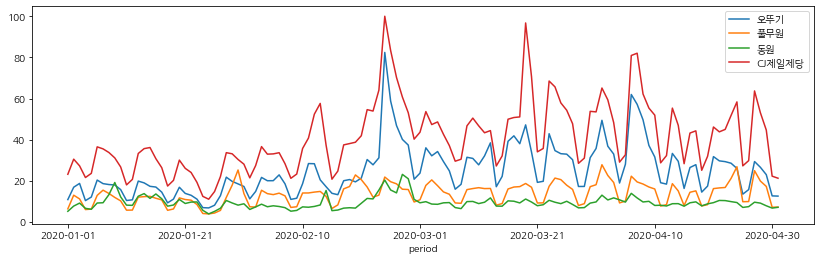

In [58]:
mdf.plot()
plt.show()

- CJ제일제당의 5월 15일쯤, 8월 11일 검색량 ratio가 100을 달성했다.
  - 이 극단값 때문에, 나머지 값들이 큰 차이가 없어보인다.
  - 이 기간을 지우고 봐야할 것 같다. 

- CJ제일제당과 관련한 데이터 검색량이 압도적이다.